In [1]:
import pandas as pd
df = pd.read_csv('/content/boston.csv')

In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [22]:
!pip install pycaret

In [ ]:
from pycaret.regression import *
s = setup(df, target = 'MEDV', session_id = 123)


,Description,Value
0,Session id,123
1,Target,MEDV
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0378,9.4958,2.9283,0.8884,0.1298,0.1000,0.2210
gbr,Gradient Boosting Regressor,2.1748,9.6803,3.0274,0.8788,0.1434,0.1117,0.1450
rf,Random Forest Regressor,2.2316,10.6310,3.1448,0.8673,0.1447,0.1129,0.3240
xgboost,Extreme Gradient Boosting,2.2746,11.4643,3.2905,0.8606,0.1474,0.1124,1.0740
lightgbm,Light Gradient Boosting Machine,2.3305,11.5722,3.2969,0.8566,0.1482,0.1157,0.1240
ada,AdaBoost Regressor,2.8789,15.9344,3.8667,0.8055,0.1803,0.1517,0.1250
dt,Decision Tree Regressor,2.9307,19.6150,4.2538,0.7368,0.1909,0.1455,0.0270
ridge,Ridge Regression,3.2793,22.8402,4.6440,0.7300,0.2460,0.1664,0.0230
lr,Linear Regression,3.3006,22.7209,4.6402,0.7295,0.2526,0.1668,0.6150
br,Bayesian Ridge,3.3158,23.2769,4.6862,0.7258,0.2453,0.1673,0.0420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [8]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [9]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                              'TAX', 'PTRATIO', 'B', 'LSTAT'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'my_best_pipeline.pkl')

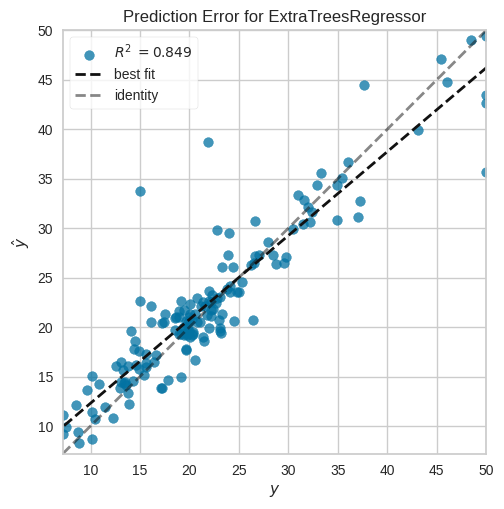

In [10]:
plot_model(best, plot = 'error')

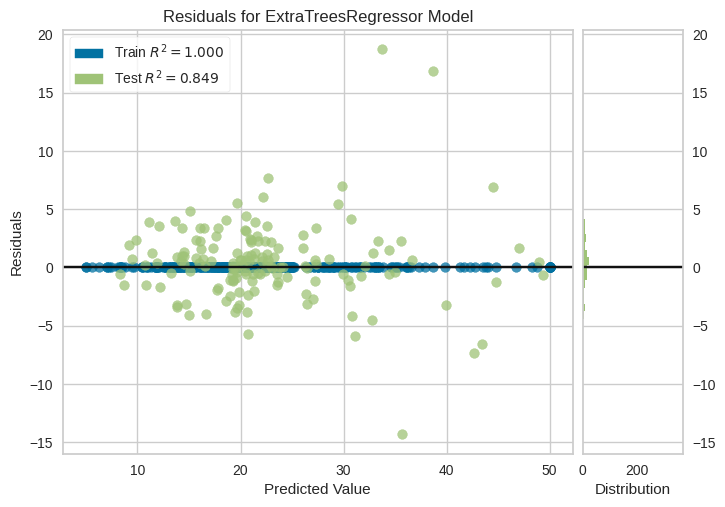

In [11]:
plot_model(best, plot = 'residuals')

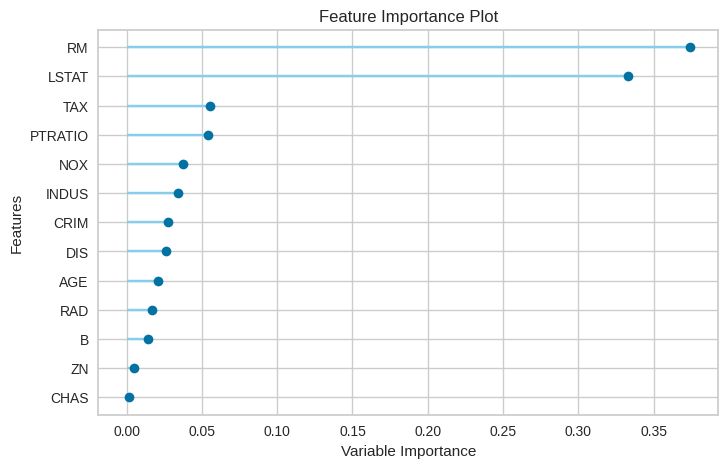

In [12]:
plot_model(best, plot = 'feature_all')

In [13]:
plot_model(best, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


In [14]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.2456,12.1828,3.4904,0.8493,0.1511,0.1185


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,prediction_label
410,51.135799,0.0,18.10,0,0.5970,5.757,100.000000,1.4130,24,666.0,20.200001,2.600000,10.11,15.000000,33.702
85,0.057350,0.0,4.49,0,0.4490,6.630,56.099998,4.4377,3,247.0,18.500000,392.299988,6.53,26.600000,27.214
280,0.035780,20.0,3.33,0,0.4429,7.820,64.500000,4.6947,5,216.0,14.900000,387.309998,3.76,45.400002,47.047
422,12.048200,0.0,18.10,0,0.6140,5.648,87.599998,1.9512,24,666.0,20.200001,291.549988,14.10,20.799999,20.473
199,0.031500,95.0,1.47,0,0.4030,6.975,15.300000,7.6534,3,402.0,17.000000,396.899994,4.56,34.900002,30.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2.635480,0.0,9.90,0,0.5440,4.973,37.799999,2.5194,4,304.0,18.400000,350.450012,12.64,16.100000,20.511
91,0.039320,0.0,3.41,0,0.4890,6.405,73.900002,3.0921,2,270.0,17.799999,393.549988,8.20,22.000000,22.671
151,1.496320,0.0,19.58,0,0.8710,5.404,100.000000,1.5916,5,403.0,14.700000,341.600006,13.28,19.600000,17.677
426,12.247200,0.0,18.10,0,0.5840,5.837,59.700001,1.9976,24,666.0,20.200001,24.650000,15.69,10.200000,15.066


# **Задача поиска аномалий**

In [15]:
from pycaret.anomaly import *
s = setup(df, session_id = 123)


,Description,Value
0,Session id,123
1,Original data shape,"(506, 14)"
2,Transformed data shape,"(506, 14)"
3,Numeric features,14
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [18]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [20]:
abod = create_model('abod')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [23]:
print(abod)

ABOD(contamination=0.05, method='fast', n_neighbors=5)


In [22]:
plot_model(abod, plot = 'tsne')

In [26]:
predictions = predict_model(abod, data=df)
predictions.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Anomaly,Anomaly_Score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0,-1.842857e+05
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0,-1.526325e+06
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0,-1.012815e+05
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0,-5.202380e+06
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0,-2.250356e+06
